#### 1. Import necessary modules

In [1271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Gather Data

Data is read using the Pandas read_csv() function and stored in df 

In [1272]:
df=pd.read_csv("scotch_review2020.csv")
df.head(3) # preview dataframe

,id,name,category,review.point,price,currency,description.1.2247.
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,$,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!"
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,$,"There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.) Editor's Choice."
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice"


#### 3. Assess Data

In [1273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2247 non-null   int64 
 1   name                 2247 non-null   object
 2   category             2247 non-null   object
 3   review.point         2247 non-null   int64 
 4   price                2247 non-null   object
 5   currency             2247 non-null   object
 6   description.1.2247.  2208 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


A look at the dataframe's schema gives us this info: 
* The dataframe consists of 2247 observations and 7 columns.
* There are no null values in the columns expect for the description.1.2247. column, it has 39 (2247-2208) observations that have null values. 
* The price column is read by Pandas as an object datatype and has to be converted to float datatype. 
* The column names for review.point and desciption.1.2247 does not seem to be consistent with other column names in the dataframe
* The file can be optimized for memory by converting columns to more approporiate data types and removing columns that may not provide any value to analysis. 

In [1274]:
# Display a sample of the dataframe
df.sample(3)

,id,name,category,review.point,price,currency,description.1.2247.
1948,1949,"Edradour 1999 Natural Cask Strength cask #295, 58.4%",Single Malt Scotch,85,118,$,"The Glasgow-based independent bottler Douglas Laing & Co. Ltd. has been responsible for quite a number of releases from the ‘lost’ Lowland distillery of Rosebank, and this one was distilled during January 1990 and bottled in April 2012. The nose is pleasingly floral and fragrant, light and gently honeyed, with a suggestion of barley in the background. The palate features spicy, sweet orange, herbs, and a slightly contrasting note of citrus fruit. Spices persist into the warming, lightly-oaked finish. £135"
1086,1087,"Gordon & MacPhail (distilled at Caol Ila) 15 year old, 40%",Single Malt Scotch,88,85,$,"After initial maturation in bourbon casks, this expression underwent a 2-month finish in first-fill oloroso sherry casks. Initially it offers char, then ginger, honey, and sweet smoke on the nose, with apricot tarts and toffee. The palate is quite earthy and peppery, with stone fruit, cinnamon, sea salt, and light smokiness. Medium length in the finish, with citrus fruit and salty oak."
1097,1098,"Scott's Selection (distilled at Highland Park) 1981 vintage, 50.6%",Single Malt Scotch,88,215,$,"This breezy, coastal dram revels in aromas of lemon, pine needle, ozone, clotted cream, lavender, rock pools, and light peat smoke, though there’s no smoking Tommy gun. A good-weight dram with bitter lemon, royal icing, vanilla, and toffee, plus assertive pepper, oak char, and burnt sugar that pummel away like a street fighter, finally calming to an olive oil finish. This is a proper Islay whisky, if you dare. (U.S. Exclusive; 2,000 bottles)."


In [1275]:
# display the values in the name column
pd.set_option('display.max_colwidth', None)
df["name"].head(10)

0                 Black Bowmore 42 year old 1964 vintage, 40.5%
1                   Bowmore 46 year old (distilled 1964), 42.9%
2                                Johnnie Walker Blue Label, 40%
3               Glenlivet Cellar Collection 1969 vintage, 50.8%
4    The Macallan 29 year old 1976 Vintage (Cask #11354), 45.4%
5                                The Dalmore 50 year old, 52.8%
6                             Gold Bowmore 1964 vintage, 42.4% 
7                                    Bowmore 40 year old, 44.8%
8                                Compass Box The General, 53.4%
9             Glenfarclas Family Casks 1954 (Cask #1260), 47.2%
Name: name, dtype: object

In [1276]:
# check for duplicates in the whiskey name column
df.duplicated(subset=["name"],keep = False).sum()

116

In [1277]:
# count the number of values in the category column
df["category"].value_counts()

Single Malt Scotch            1835
Blended Scotch Whisky          247
Blended Malt Scotch Whisky     165
Name: category, dtype: int64

Taking a closer look at the observations we can deduce that
* The id column  and the currency column can be dropped without any loss of details; they do not provide any value for analysis. 
* The name column has much more info than just the whiskey's name; there is abv percentage, age statement, if cask strength is used and if it is from a single cask
* The name column has 116 duplicates.
* The category column has three types of categories for its values

#### 4. Cleaning, conversions and optimization

In [1278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2247 non-null   int64 
 1   name                 2247 non-null   object
 2   category             2247 non-null   object
 3   review.point         2247 non-null   int64 
 4   price                2247 non-null   object
 5   currency             2247 non-null   object
 6   description.1.2247.  2208 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


<span style ='color:green'>The dataframe currently uses 123 KB of memory , we can optimize it for memory by using appropriate data types and dropping columns deemed unnecessary for analysis </span>

In [1279]:
# look for count of values in currency column
df["currency"].value_counts()

$    2247
Name: currency, dtype: int64

* <span style ='color:green'>The currency column has only one value; the "$" sign. Dropping the currency column will not cause any loss in details.</span>

* <span style ='color:green'>To compensate for removing the currency column we can use a more descriptive name for the price column and rename it as price_usd.</span>

* <span style ='color:green'>We have a numeric index created by pandas for our dataframe , we can also safely drop id column and not loose any details. </span>

Dropping and renaming columns

In [1280]:
# drop the id and currency columns
df=df.drop(columns=["id","currency"])

In [1281]:
# rename price column to price_usd and descrption.1.2247. to review and review.point to points
df=df.rename(columns={"price":"price_usd","description.1.2247.":"review","review.point":"points"})
df.head(2)

,name,category,points,price_usd,review
0,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!"
1,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,"There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.) Editor's Choice."


Converting datatypes of columns

In [1282]:
df["category"].value_counts()

Single Malt Scotch            1835
Blended Scotch Whisky          247
Blended Malt Scotch Whisky     165
Name: category, dtype: int64

<span style ='color:green'>We have just three categories so converting this column to category datatype will save us memory </span>

In [1283]:
df["category"]=df["category"].astype("category")

In [1284]:
df["price_usd"].value_counts()

100       86
65        78
70        61
60        57
80        57
          ..
4,350      1
12,500     1
245        1
6,000      1
440        1
Name: price_usd, Length: 474, dtype: int64

<span style ='color:green'>We can see some aplhanumeric characters in the values of the price column. We need to convert all the values to numeric before we can change the datatype </span>

In [1285]:
# Remove any ',' and '$' signs from the values in the price_usd column
df["price_usd"] = df["price_usd"].replace('[\$,]', '', regex=True)

In [1286]:
# Find if there are still any non numeric values in the price_usd column
price_not_numeric = pd.to_numeric(df["price_usd"], errors = 'coerce').isnull()
df[price_not_numeric]["price_usd"]

33      15000 or 60000/set
92              150/375ml.
94               50/375ml.
186              60000/set
359              50/375ml.
739              60000/set
778             100/375ml.
1010              44/liter
1280            132/700ml.
1548             60000/set
1814             60000/set
1825         39/1.75 liter
2027              35/liter
2200         18/1.75 liter
Name: price_usd, dtype: object

In [1287]:
# Regular scotch whiskey bottle sizes are normally 750 ml and a set is 4 bottles. 
# We need to calculate the prices that are not per 750 ml to the standard bottle size (750 ml)
df.loc[[33, 186,739, 1548, 1814], "price_usd"] = 15000 
df.loc[[92], "price_usd"]=150*2
df.loc[[94], "price_usd"]= 50*2
df.loc[[359], "price_usd"]= 50*2
df.loc[[778], "price_usd"]=100*2
df.loc[[1010], "price_usd"]=44*(750/1000)
df.loc[[1280], "price_usd"]=132*(750/700)
df.loc[[1825], "price_usd"]=39*(750/1750)
df.loc[[2027], "price_usd"]=35*(750/1000)
df.loc[[2200], "price_usd"]=18*(750/1750)

In [1288]:
# Convert the price_usd column to int datatype
df["price_usd"] =df["price_usd"].astype(int)

Remove duplicates in name column 

In [1289]:
duplicate_names=df.duplicated(subset=["name"],keep = False)
duplicate_names.sum()

116

<span style = "color:green">There are 116 duplicates in the name column, we need to drop the dupes. We can drop duplicates that have lowest points and keep the ones with higher points </span>

In [1290]:
# Sort df by points descending 
points_sorted_df = df.sort_values(by="points",ascending=False)
points_sorted_df.head()

,name,category,points,price_usd,review
0,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!"
2,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice"
1,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,"There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.) Editor's Choice."
7,"Bowmore 40 year old, 44.8%",Single Malt Scotch,96,11000,"Definitely showing its age, but not in a bad way — the distillery character is still there. Solid foundation of thick, chewy toffee, old pot still rum, and fig cake. Fruity too, with notes of golden raisin and nectarine. Soft, seductive peat smoke, juicy oak, cinnamon, and brine round out the palate. Excellent balance! One of the finest Bowmore whiskies I’ve ever tasted (and, at this price, will probably never taste again.) (Editor's Pick)"
10,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charming, this first blended malt from Chivas Regal contains selections of five Speyside malts: Strathisla, Longmorn, Tormore, Allt-a-Bhainne, and Braeval. Red apple, cherry, raspberry fudge, peach and mango fruit salad, dusting of cinnamon, and dry heather sprigs. In essence, it’s rich and satisfying, with dark vanilla, apricot, Bourneville-covered Brazil nuts, and tangerine, smoothed over by caramel and wood spices, maltiness, and gingersnap biscuits. Quite heavenly. Editor's Choice"


In [1291]:
# Remove duplicates from the sorted df keeping the ones with higer points
df=points_sorted_df.drop_duplicates(subset='name', keep='first')

In [1292]:
# reset index to remove gaps in the index range
#df.reset_index(drop="index")

In [1293]:
# check to see the dataframe schema and stats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2246
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       2187 non-null   object  
 1   category   2187 non-null   category
 2   points     2187 non-null   int64   
 3   price_usd  2187 non-null   int32   
 4   review     2149 non-null   object  
dtypes: category(1), int32(1), int64(1), object(2)
memory usage: 79.2+ KB


<span style= "color:green"> The columns now have the right data types and memory usage is reduced from 123 KB to 79 KB, duplicate names have been removed and unnecessary columns have been dropped </span>

#### 5. Transformations (Creating new columns from existing columns  )

##### 5.1 Extract ABV from whiskey's label

In [1294]:
# Use name column values to extract Alcohol By Volume % (ABV)
df["abv%"] = df["name"].str.extract(r"([\(\,\,\'\"\’\”\$] ? ?\d+(\.\d+)?%)")[0]
df["abv%"] = df["abv%"].str.replace("[^\d\.]", "")

C:\Users\149300\AppData\Local\Temp\ipykernel_15712\4088647496.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["abv%"] = df["abv%"].str.replace("[^\d\.]", "")


In [1295]:
df.sample(5, random_state=8)

,name,category,points,price_usd,review,abv%
1619,"Peerless (distilled at Glenrothes) 1967, 35 year old, 40.5%",Single Malt Scotch,86,135,"Ripe peaches, vanilla, sweet oak, and milky coffee on the nose. The palate is luscious and smooth, with sweet orange notes and cinnamon. The finish is medium in length, with spicy berry fruits, oak, and lingering ginger.",40.5
2006,"Ledaig 18 year old, 46.3%",Single Malt Scotch,85,115,"This Jura expression was distilled in 1984 and matured in bourbon casks for 22 years before a further 6 years in Gonzalez Byass Matusalem sherry butts and 2 years in Amoroso and Apostoles oloroso sherry casks. The nose opens with beef gravy, soon followed by prunes, cherries, dark chocolate, and PX sherry. Full-bodied, rich and sweet on the palate, with lively spices, and more cherries, and chocolate. Long and fruity in the finish, with spicy sherry and licorice. £750",46.3
1072,"Monkey Shoulder Smokey Monkey, 40%",Blended Scotch Whisky,89,41,"This rich, smooth, and enticing blend first launched in 1976. It offers aromas of barley, malt, honey, praline cookies, vanilla seed, and smoke. The palate is bright with honey, citrus zest, Quaker Oat Crisp, graham cracker, and vanilla fudge, with gentle pepper, hot cross bun, and orange notes appearing as it becomes creamier. Orange, barley notes, and smoke dance off into the finish.",40
48,"Highland Park 1977 vintage 29 year old (Cask #7957), 48.5%",Single Malt Scotch,94,300,"A delicious, well-balanced, ultra-matured expression of Highland Park. Toffee apples, molasses, and vanilla fudge provide a sweet foundation, with evolving notes of dark chocolate, dry spicy oak, tobacco, subtle smoke, and lingering brine on the finish. Nicely done. (Bottled for Old Oaks Cigar & Wine Company)",48.5
1566,"ScotchMe!, 44.4%",Blended Malt Scotch Whisky,87,34,"Distilled in June 2007 and bottled in October 2016, this expression spent 6 years in first-fill bourbon casks, then 3 years in Barolo wine casks. Fresh on the early nose; herbaceous, with pineapple and a hint of oil. Big in the mouth, with white pepper, more pineapple, dried fruits, and coconut milk. Drying to tannins, with dark berries in the lengthy, minty finish. (10,800 bottles)",44.4


##### 5.2 Extract Year from whiskey's label

In [1296]:
# Use name column values to extract label year
df["year"]=df.name.str.extract(r'( 19\d{2}|20\d{2})')

In [1297]:
df.sample(6, random_state=42)

,name,category,points,price_usd,review,abv%,year
2027,"The Street Pumas’, 40%",Blended Scotch Whisky,85,26,"This expression was released to celebrate the Scottish feature film “Fairy Flag,” and after maturing for 8 years in bourbon barrels, the whisky then spent 7 years aging in oloroso sherry casks. Initially meaty with rich sherry, raisins, and cocoa powder, then increasing vanilla notes, plus warm leather and wood polish. Sweet and very spicy on the palate, with caramel, chili, and cinnamon. The finish is medium in length, with peppery plain chocolate. £65",40,NaN
1514,"Wemyss Malts Waffles and Ice Cream (distilled at Clynelish) 1997, 54.2%",Single Malt Scotch,87,144,"This cask strength, port cask-aged whisky comes from an undisclosed distillery near Aberlour. The impact of the port cask is unmistakable, with a nose that is deeply fruity with dried apricot, blackberry jam, honey, and malt. On the palate these rich sweet fruit notes are well balanced by black pepper, clove, salt, honey, and a touch of dark chocolate. The underlying proof also helps counterbalance the sweet fruit and drives a medium length and slightly dry finish. (U.S. only)",54.2,1997
662,"Bruichladdich Islay Barley 2007 6 year old, 50%",Single Malt Scotch,90,72,"Rooted in the earth and redolent of late autumn. There’s a plummy thread that runs through this range; here we’ve gone to prune, mixed with dried cherries, and a sweet/savory edge whose whiff of heavy rose petal is reminiscent of Barolo. Robust, yet sweet. Heady, like chocolate-covered Turkish Delight. The palate has oloroso notes alongside Assam-like tannins. One to have with water on the side. Classical in structure and aromatics, but that vinous sweetness is new. £120",50,2007
1424,"Balblair 1975, 46%",Single Malt Scotch,87,375,"Aged in both refill and new bourbon casks. The new bourbon casks are evident, and I think it adds richness, vibrancy, and perceived maturity (which I like) when compared to the previous Summer 2010 release. Very pale in color. Brooding, with licorice root, coal tar, bacon fat, damp peat, bright fruit (citrus and pear), and intriguing botanicals, all on a soothing bed of vanilla malt. Smoky, briny finish. I’m still amazed how this very young whisky can taste so mature. Well done!",46,1975
918,"Arran The Devil’s Punch Bowl Chapter II: Angels & Devils, 53.1%",Single Malt Scotch,89,130,"After initial maturation in American white oak, this 1991 expression was filled into a 15 year old Lepanto brandy cask from Gonzales Byass in May 2003, ultimately being re-racked into a fresh ‘distillery run’ bourbon barrel in August 2009. Caramel and white chocolate on the nose, malt, fudge, cinnamon, and nutmeg, then burnt treacle and hot brandy. Malt, sweet spice, almonds, bananas, and fudge on the palate. Spicy fruits in the lengthy Armagnac-like finish. Cask number 1; 233 bottles.",53.1,NaN
2234,"Bruichladdich 12 year old (2nd Edition), 46%",Single Malt Scotch,83,60,NaN,46,NaN


##### 5.3 Find if whiskey is sold "Cask strenght" 

In [1298]:
df["cask_strenght"]=df["name"].str.lower().str.contains("cask strength")

In [1299]:
df[df["cask_strenght"]].sample(3, random_state=42)

,name,category,points,price_usd,review,abv%,year,cask_strenght
2111,"Arran 12 year old Cask Strength, 53.6%",Single Malt Scotch,84,70,"Good weight to this blend. Creamy and mouth-coating on the palate, with a nice malty, honey-tinged backbone. Bright fruitabounds, with golden raisin, lemon meringue, peach, and a hint of pineapple. Notes of creamy vanilla and gently nutty, through to its soft finish. \r\n",53.6,NaN,True
720,"GlenDronach Cask Strength (Batch 6), 56.1%",Single Malt Scotch,90,71,"This was matured in first-fill sherry, bourbon, French wine, and tempranillo casks. Initial brine on the nose gives way to malt and orchard fruits, sweet smoke, and buttery malt. Sweet, medicinal smoke notes on the early palate, then toffee and peaches drying to aniseed and chili. Long and prickly in the finish, with licorice and black pepper. A complex rendering of Port Charlotte.",56.1,NaN,True
1100,"Laphroaig Original Cask Strength 10 year old, 57.3%",Single Malt Scotch,88,60,"Gold color. Floral aromas balanced with a gentle vanilla sweetness, and soft fruit. Soft, rounded body. The palate delivers what the aroma promises in a very clean and balanced way. Pleasing finish. \r\n",57.3,NaN,True


##### 5.4 Find if the whiskey is bottled from a single cask

In [1300]:
# use name value to find out if the whiskey is bottled from a single cask (barrel) 
df["single_cask"]=df["name"].str.lower().str.contains('|'.join(["single cask ","single barrel","cask #"]))

In [1301]:
df[df["single_cask"]].sample(3)

,name,category,points,price_usd,review,abv%,year,cask_strenght,single_cask
1994,"The Balvenie DCS Compendium 1st Chapter 1985 30 year old (Cask #612), 54.1%",Single Malt Scotch,85,1872,"An interesting nose that’s somewhat akin to a peach cheesecake with slightly burnt pastry, or a heavily caramelized crème brûlée. Overt smoke is in check when neat. In the mouth, however, it comes through massively, mossy and oily and sitting on top of those fat fruits and sweet malt. Thicker and more farmyard-like than Port Charlotte. Great potential, with a sweetness that shows it’s pretty much there. £150",54.1,1985,False,True
1327,"Single Malts of Scotland 13 year old Glen Elgin 2006 Single Cask (Cask No. 9800011), 54.1%",Single Malt Scotch,88,125,"Spicy on the nose, with deep, full tropical fruit notes, praline, and marzipan. The palate is silky, with fudge and raisins, then cherry liqueur. The finish yields dark chocolate and citrus fruit, plus peppery oak.",54.1,2006,False,True
578,"Signatory (distilled at Brora), 24 year old, 1981 vintage, Cask # 06/656, 60.1%",Single Malt Scotch,90,225,"\r\n\r\nFruit and grain drive this solid sipper, with aromas of banana, cantaloupe, almond paste, and lemon-ginger tea to start. In the mouth, it’s rounded and full, showing zingy lemon, biscuity malt, cooked bananas, and milk chocolate. Water brings out brighter fruit flavors: strawberry, lemon, and green apple hard candies. The finish comes full circle, with bananas, lemon, almonds, and vanilla. (216 bottles; U.S. exclusive)",60.1,1981,False,True


##### 5.5 Extract Age from whiskey's label

In [1302]:
# use name value to find the age of the whiskey when bottled
df["age"]=df["name"].str.extract(r'(\d+) year')[0]

In [1303]:
df.sample(4,random_state=4)

,name,category,points,price_usd,review,abv%,year,cask_strenght,single_cask,age
1067,"Tomintoul 12 year old Kedem Port Cask-Finished, 40%",Single Malt Scotch,89,75,"A pale blend with hidden depths of flavor and a sweet nose of honeyed pear, vanilla, Golden Delicious apples, taffy, and custard tarts, all overlaid with ashy smoke and drifting smoke trails from snuffed-out candles. Pear, apple, clove, and cracked black pepper meet butter toffee, vanilla, and nippy spices. It’s imbued with a pretty smoky flavor for a peated cask, and leaves a creamy aftertaste to savor. £32",40,NaN,False,False,12
216,"Kilchoman ImpEx Cask Evolution 02/2019 Single Cask Oloroso Sherry Cask-Matured (Cask #622/11), 56.1%",Single Malt Scotch,93,140,"This bottling from 1992 was distilled partly from dark-roasted chocolate malt. Classic Balvenie honey and fruit spices on the nose, with light oiliness, ginger, and orange blossom. Rich flavors of canned pears and pineapple in syrup on the palate, with hot chocolate and wood spices. Marzipan, dark chocolate, and black pepper in the long finish. A delightfully different Balvenie. (150 bottles)",56.1,2019,False,True,NaN
1218,"Lagavulin 8 year old, 48%",Single Malt Scotch,88,65,"Light gold, with good intensity and a more noticeable malty note than is common with this distillery, as well as touches of daffodil and dried honeycomb. The wood influence appears minimal to start with, but more vanilla creeps through in time; water brings out almond milk. Opens into clementine peel, pomelo, then cooked dessert apple. The palate is clean and forward; even slightly hot when neat. Remarkably assertive for a 25 year old.",48,NaN,False,False,8
1233,"Loch Lomond 12 year old, 46%",Single Malt Scotch,88,55,"As part of its program to make available single malts from all five of its Scotch whisky distilleries, Bacardi subsidiary John Dewar & Sons has now released a trio of bottlings from Royal Brackla, situated near Nairn in the Scottish Highlands. The 12, 16, and 21 year old expressions are initially available in ten markets, Including the UK, U.S., and Canada.\r\nRicher and more complex than its younger sibling, with waxy peel, glacé cherries, sherry, sultanas, and custard. Silky smooth in the mouth, with marshmallows, milk chocolate, medium-sweet sherry, and stem ginger. Tingling spices allied to darkening chocolate and a touch of smoke in the medium to long finish. Finally, a fat, buttery note.",46,NaN,False,False,12


##### 5.6 Extract whiskey Name from Label 

In [1304]:
df["whiskey"]=df["name"].str.split(",",expand=True,n=2)[0]

In [1305]:
df.sample(4,random_state=41)

,name,category,points,price_usd,review,abv%,year,cask_strenght,single_cask,age,whiskey
1163,"Dailuaine 16 year old Flora & Fauna, 43%",Single Malt Scotch,88,65,"Balblair 2001 Vintage is the first distillery bottling to be non-chill filtered, noncolored, and offered at 46%. It is 10 years old and has been matured in ex-bourbon barrels. The nose offers lemonade, vanilla, allspice, and developing milk chocolate and caramel notes. Clean and straightforward on the palate; sweet and spicy, with tangerines, eating apples, toffee, and more milk chocolate. Cocoa powder in the spicy, relatively lengthy finish. £33",43,NaN,False,False,16,Dailuaine 16 year old Flora & Fauna
1767,"Springbank Green 12 year old, 46%",Single Malt Scotch,86,90,"Matured in cognac before being finished in Sauternes; here we have a clean, sweet, and well-rounded Bunna’, with hickory-like smoke, bonfire, and ginger biscuits. Lightly vegetal notes with farmyard elements among the smoke and thick, citric sweetness. Immediate smoke on top of this mix of spice, Seville orange, apricot, cheesecake base, hazelnut, red fruits, and preserved ginger in syrup adding an almost peppery finish. Lovely. £250",46,NaN,False,False,12,Springbank Green 12 year old
2110,"Glenglassaugh Evolution, 57.2%",Single Malt Scotch,84,78,"Deeper and darker when compared to its younger siblings, but with the same personality. Drier, especially on the finish, with added oak resin, espresso, leather, and tobacco. Bonus points for character.\r\n",57.2,NaN,False,False,NaN,Glenglassaugh Evolution
1647,"GlenDronach 12 year old, 46%",Single Malt Scotch,86,59,"Antique gold. Aromas of toffee, malty sweetness, fresh mint and subtle oak. Mouth coating, creamy texture-almost chewy-with flavors of toffee, almonds, dark chocolate, and subtle wood spices on the finish. This is a very pleasing, straightforward whisky that is quite mature for its age.",46,NaN,False,False,12,GlenDronach 12 year old


##### 5.7 Convert data types of the new columns

In [1306]:
# check to see if the new columns are of the right data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2246
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           2187 non-null   object  
 1   category       2187 non-null   category
 2   points         2187 non-null   int64   
 3   price_usd      2187 non-null   int32   
 4   review         2149 non-null   object  
 5   abv%           2177 non-null   object  
 6   year           807 non-null    object  
 7   cask_strenght  2187 non-null   bool    
 8   single_cask    2187 non-null   bool    
 9   age            1152 non-null   object  
 10  whiskey        2187 non-null   object  
dtypes: bool(2), category(1), int32(1), int64(1), object(6)
memory usage: 151.8+ KB


In [1307]:
# Convert data types of abv and age
df["abv%"]=df["abv%"].astype("float")
df["age"]=df["age"].astype("float")

In [1308]:
# check to see if data types are right
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2246
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           2187 non-null   object  
 1   category       2187 non-null   category
 2   points         2187 non-null   int64   
 3   price_usd      2187 non-null   int32   
 4   review         2149 non-null   object  
 5   abv%           2177 non-null   float64 
 6   year           807 non-null    object  
 7   cask_strenght  2187 non-null   bool    
 8   single_cask    2187 non-null   bool    
 9   age            1152 non-null   float64 
 10  whiskey        2187 non-null   object  
dtypes: bool(2), category(1), float64(2), int32(1), int64(1), object(4)
memory usage: 151.8+ KB


##### 5.8 Calculate cost per review point

In [1309]:
# cost per point is what consumer pays for the whiskey over review points the whiskey earned
df["cost_per_point"] = df["price_usd"]/df["points"]
df.head(4)

,name,category,points,price_usd,review,abv%,year,cask_strenght,single_cask,age,whiskey,cost_per_point
0,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!",40.5,1964,False,False,42.0,Black Bowmore 42 year old 1964 vintage,46.391753
2,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice",40.0,NaN,False,False,NaN,Johnnie Walker Blue Label,2.319588
1,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,"There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.) Editor's Choice.",42.9,1964,False,False,46.0,Bowmore 46 year old (distilled 1964),139.175258
7,"Bowmore 40 year old, 44.8%",Single Malt Scotch,96,11000,"Definitely showing its age, but not in a bad way — the distillery character is still there. Solid foundation of thick, chewy toffee, old pot still rum, and fig cake. Fruity too, with notes of golden raisin and nectarine. Soft, seductive peat smoke, juicy oak, cinnamon, and brine round out the palate. Excellent balance! One of the finest Bowmore whiskies I’ve ever tasted (and, at this price, will probably never taste again.) (Editor's Pick)",44.8,NaN,False,False,40.0,Bowmore 40 year old,114.583333


##### 5.9 Rearrange the dataset

<span style = "color:green"> With the introduction of new columns (whiskey, age, year, abv%) to the dataset, the name column is redundant </span>

In [1310]:
# drop the name column and rearrange the columns position inside the new dataframe
df=df.drop(columns="name")
df=df[["whiskey","category","points","price_usd","age","abv%","cost_per_point","single_cask","cask_strenght","year","review"]]
df.head(2)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
0,Black Bowmore 42 year old 1964 vintage,Single Malt Scotch,97,4500,42.0,40.5,46.391753,False,False,1964,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!"
2,Johnnie Walker Blue Label,Blended Scotch Whisky,97,225,NaN,40.0,2.319588,False,False,NaN,"Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice"


#### 6. Handling missing values

<span style = "color:green"> With the introduction of new columns (features) to the dataset, there are possibilites that some of those new columns have missing (null) values </span>

In [1311]:
# take a look at the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   whiskey         2187 non-null   object  
 1   category        2187 non-null   category
 2   points          2187 non-null   int64   
 3   price_usd       2187 non-null   int32   
 4   age             1152 non-null   float64 
 5   abv%            2177 non-null   float64 
 6   cost_per_point  2187 non-null   float64 
 7   single_cask     2187 non-null   bool    
 8   cask_strenght   2187 non-null   bool    
 9   year            807 non-null    object  
 10  review          2149 non-null   object  
dtypes: bool(2), category(1), float64(3), int32(1), int64(1), object(3)
memory usage: 151.8+ KB


<span style = "color:green"> The abv% column which is important for our data analysis has null values. </span>

<span style = "color:green">One way of the handling the null values for abv% column is by finding the mean, mode and mode abv% for each category of whiskey (Single Malt,Blended Malt,Blended Malt).Then use the appropriate value to fill the missing abv% values in each category </span>

<span style = "color:green"> But before deciding on using the mean or mode or median values to fill null abv% values, we need to check if there are too many outliers of abv% in each category</span>

In [1312]:
# group using the category column
category_group=df.groupby(by="category")

In [1313]:
# finding null values for abv% in each group
category_group.get_group("Single Malt Scotch")["abv%"].isnull().sum()

10

In [1314]:
# the total null values for abv% in the dataframe
df["abv%"].isnull().sum()

10

<span style = "color:green">Looks like all the missing abv% values belong to the "Single Malt Scotch" category.
Lets see what the distribution of the abv% in that category looks like</span> 

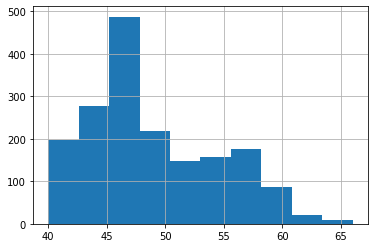

In [1315]:
category_group.get_group("Single Malt Scotch")["abv%"].hist();

<span style = "color:green"> The histrogram is left skewed (shows presence of outliers). We can use either the mode or median value to fill the missing values in abv% column </span> 

In [1316]:
# calculate the mode for "Single Malt Scotch" abv%
category_group.get_group("Single Malt Scotch")["abv%"].mode()[0]

46.0

In [1317]:
# calculate the median for "Single Malt Scotch" abv%
category_group.get_group("Single Malt Scotch")["abv%"].median()

46.150000000000006

<span style = "color:green"> The median and mode value is the same for this category. So we can just use the mode value to fill the missing values in abv% </span> 

In [1341]:
df["abv%"]=df.groupby("category")["abv%"].apply(lambda x: x.fillna(x.mode()[0]))

In [1345]:
# check to see if any null values after fillna() operation
df["abv%"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2187 entries, 0 to 2246
Series name: abv%
Non-Null Count  Dtype  
--------------  -----  
2187 non-null   float64
dtypes: float64(1)
memory usage: 34.2 KB


<span style = "color:green">Good! There are no more missing values in abv% </span> 

#### Exploratory data analysis <span style="color:green"> (with Questions) </span>

Question 1:  Is the most premium whiskey bottled from a single cask ?

In [1353]:
# sort the dataframe by price_usd in descending order and see if the singe_cask column holds True for the top most observation
df.sort_values(by="price_usd", ascending=False)["single_cask"][0]

False

In [1356]:
# print the top most record in the sorted dataframe 
df.sort_values(by="price_usd", ascending=False).head(1)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
151,Diamond Jubilee by John Walker & Sons,Blended Scotch Whisky,93,157000,NaN,42.5,1688.172043,False,False,NaN,"Bowmore lovers rarely get excited about the smokiness of their favorite single malt. Rather, they obsess about the tropical fruits that some old bottlings exhibit. Here is one such example. Initially the nose suggests verjus and linseed oil, but then peachiness rather than beachiness emerges. The smoke hits first on the tongue, backed up with mango and violet, then the tropical elements and the smoke play off each other up until a guava-laden finish."


In [1360]:
# Print if the top 5 most priced whiskey's are from single casks 
df.sort_values(by="price_usd", ascending=False)["single_cask"].head(5)

151    False
182    False
82     False
88     False
699    False
Name: single_cask, dtype: bool

<span style = "color:green"> The most expensive whiskey is NOT made from a single cask or a barrel, matter of fact it is a blended scotch that uses malt and grains and final product is a blend from multiple barrels and none of the top 5 priced whiskeys are bottled from single casks</span> 

Question 2:  Is the most strongest whiskey (by ABV) bottled at cask strenght or was it watered down during bottling ?

In [1361]:
# sort the dataframe by abv% in descending order and see if the cask_strenght column holds True for the top most observation
df.sort_values(by="abv%", ascending=False)["cask_strenght"][0]

False

In [1362]:
# lets coroborate that by seeing the whole record in the dataframe
df.sort_values(by="abv%", ascending=False).head(1)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
1926,Wemyss Malts Fruit Bonbons (distilled at Glen Garioch) 1989,Single Malt Scotch,85,137,NaN,66.0,1.611765,False,False,1989,"This 1998 vintage triple distilled Lowland Auchentoshan has been matured in fino sherry casks, which are rarely used for Scotch whisky maturation. The nose presents violets in fresh soil, honey, spice, developing citric fruit notes, and almonds. Quite full-bodied, fruity and zesty in the mouth. Lengthy in the finish, with spice, nuts, and oak. Becoming dry and gingery at the last."


In [1369]:
# But what about the whiskeys in top 5 abv% list, lets check out!
df.sort_values(by="abv%", ascending=False).head(5)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
1926,Wemyss Malts Fruit Bonbons (distilled at Glen Garioch) 1989,Single Malt Scotch,85,137,NaN,66.0,1.611765,False,False,1989,"This 1998 vintage triple distilled Lowland Auchentoshan has been matured in fino sherry casks, which are rarely used for Scotch whisky maturation. The nose presents violets in fresh soil, honey, spice, developing citric fruit notes, and almonds. Quite full-bodied, fruity and zesty in the mouth. Lengthy in the finish, with spice, nuts, and oak. Becoming dry and gingery at the last."
1115,Caol Ila 'Unpeated Style,Single Malt Scotch,88,60,10.0,65.8,0.681818,False,False,2009,"Deep gold color. This whisky is finished off in new oak, and it certainly shows. There are lots of complex wood spices in this whisky, and it is intensely deep and mature for such a young age. There’s a firmness to the whisky that’s very appealing. It is exciting too, with notes of toasted oak, vanilla, and a hint of dark chocolate."
1296,Balvenie 2009 vintage,Single Malt Scotch,88,661,NaN,64.6,7.511364,False,False,2009,"A mix of American and Spanish oak casks was used to mature this addition to the core range. A big blast of orchard and tropical fruits characterizes the early nose, along with honey, vanilla, and toffee. The palate also majors in fruit, this time principally oranges, plus caramel, cinnamon, milk chocolate, and lots of vanilla. The finish is quite short, with banana and ginger."
2124,Single Malts of Scotland (distilled at Tormore) 1988,Single Malt Scotch,84,150,NaN,64.2,1.785714,False,False,1988,"A Glen Ord bottled by the London wine and spirits establishment of Milroy’s, and a relatively rare opportunity to sample single malt from this Diageo-owned distillery. The nose initially presents lemon zest, then peaches and caramel, with cream soda notes. Very fruity and lively in the mouth, with a nutty, malty undercurrent. Medium in length; firm, with spicy fruit lasting to the very end, accompanied by a touch of well-mannered fresh oak. £45 Currently not available in the U.S."
1957,Octomore Islay Barley 2009,Single Malt Scotch,85,239,NaN,64.0,2.811765,False,False,2009,"One of the latest batch of single cask bottlings from Wemyss Malts is a 15 year old Clynelish, named ‘Fresh Fruit Sorbet.’ 331 bottles have been released. Tinned pears, new-mown hay, honey, and lemon sherbet on the nose, with a hint of machine oil. The palate is smooth and fruity, with pears, figs, and a suggestion of black pepper. The dominant fruitiness continues through the sugary finish, with a background prickle of spice. £60"


<span style = "color:green"> The most strongest whiskey (by ABV) is NOT bottled at cask strenght and they are pretty strong even after dilution and also none of the top 5 strongest whiskeys are bottled at cask strenght</span> 

In [1375]:
# Trivia : The top 10 strongest whiskeys are all single malts
df.sort_values(by="abv%", ascending=False)["category"][:10]

1926    Single Malt Scotch
1115    Single Malt Scotch
1296    Single Malt Scotch
2124    Single Malt Scotch
1957    Single Malt Scotch
2227    Single Malt Scotch
1322    Single Malt Scotch
241     Single Malt Scotch
622     Single Malt Scotch
403     Single Malt Scotch
Name: category, dtype: category
Categories (3, object): ['Blended Malt Scotch Whisky', 'Blended Scotch Whisky', 'Single Malt Scotch']

Question 3:  What is the most prominent category among whiskeys that are highly rated (above 85 point)?

In [1376]:
# create a dataframe that holds only whiskey data with points greater than 85
higest_rated = df[df["points"]>85]

In [1378]:
# check out the new dataframe
higest_rated.head(3)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
0,Black Bowmore 42 year old 1964 vintage,Single Malt Scotch,97,4500,42.0,40.5,46.391753,False,False,1964,"What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!"
2,Johnnie Walker Blue Label,Blended Scotch Whisky,97,225,NaN,40.0,2.319588,False,False,NaN,"Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice"
1,Bowmore 46 year old (distilled 1964),Single Malt Scotch,97,13500,46.0,42.9,139.175258,False,False,1964,"There have been some legendary Bowmores from the mid-60s and this is every bit their equal. All of them share a remarkable aroma of tropical fruit, which here moves into hallucinatory intensity: guava, mango, peach, pineapple, grapefruit. There’s a very light touch of peat smoke, more a memory of Islay than the reality. Concentrated; even at low strength the palate is silky, heady, and haunting, and lasts forever in the dry glass. A legend is born. (Eight bottles only for the U.S.) Editor's Choice."


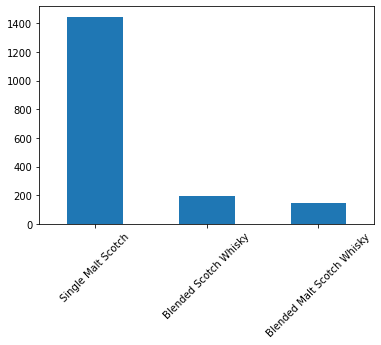

In [1381]:
#plot a bar chart to figure out the category with most whiskeys greater than 85 points 
higest_rated["category"].value_counts().plot.bar(rot=45);

<span style = "color:green"> The most prominent category (close to 1400) amongst the highly rated whiskeys is the Single Malt. The only next nearest category is the Blended scotch at near 200  </span> 

Question 4:  What category of whiskey usually commands higer price ?

In [1394]:
df.groupby("category")["price_usd"].mean().sort_values(ascending=False).head(1)

category
Blended Scotch Whisky    942.178423
Name: price_usd, dtype: float64

<span style = "color:green">On an average Blended scotch whiskies sell at prices higer than  other 2 categories </span> 

Question 5:  Which whiskey is best bang for you buck when it comes to the highest rated whiskies (95 points and above) ?

In [1397]:
# create a dataframe that only holds whiskies with points 95 and above
points_95_and_above = df[df["points"]>=95]

In [1403]:
# sort the new dataframe using cost_per_point in the descending order 
points_95_and_above.sort_values(by="cost_per_point",ascending=False).head(1)

,whiskey,category,points,price_usd,age,abv%,cost_per_point,single_cask,cask_strenght,year,review
29,Bowmore 50 year old (distilled 1961),Single Malt Scotch,95,26650,50.0,40.7,280.526316,False,False,1961,"The whisky is sensational, a glorious mix of ginseng syrup, baked banana, semi-dried tropical fruits, and an exotic smoked edge. Without the last, you could believe it was a delicate Cognac. In time, there’s peppermint and guava syrup. A sip is all you need to reveal perfect, thrilling harmony: light nuttiness, pollen, subtle fruits, gentle smoke, and light fungal touches. It’s stunning, but it’s £16,000! Whisky this great, even in limited quantities, should be fairly priced. Points off. £16,000"


<span style = "color:green">At $26,650 and 95 points the "Bowmore 50 year old" is the best bang for your buck when it comes to scotch whiskeys rated 95 and above </span> 